In [38]:
from astropy.io import fits

from astropy.table import Table

import numpy as np
import healpy as hp



In [39]:
t = Table.read('/home/walml/repos/euclid-morphology/notebooks/rsd2024a-time-tagged-footprint-gal-12.fits')  # ringed, order 12
# t = Table.read('/home/walml/repos/euclid-morphology/notebooks/rsd2024a-footprint-12-gal.fits')
t
#  the value of each FITS pixel is the MJD2000 date of its first observation

coef
float32
10024.07
10024.07
10024.07
10024.07
10024.07
10024.07
10024.07
10024.07
10024.07


In [40]:
data = np.array(t['coef'])
del t
data

array([10024.07 , 10024.07 , 10024.07 , ..., 10045.416, 10045.416,
       10045.416], dtype='>f4')

In [41]:
data = np.where(data == -1, np.nan, data)

In [42]:
# when is survey start?
start_mjd2000 = np.nanmin(data)  # MJD2000
# 8810 days since Jan 1st 2000 (ish)

import datetime
start_dt = datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(days=int(start_mjd2000))
start_dt  # Feb 14th 2024, seems good

datetime.datetime(2024, 2, 14, 12, 0)

In [43]:
now_dt = datetime.datetime.today()
survey_time = now_dt - start_dt
survey_time.days

154

In [44]:
# data = data.astype(int)

In [45]:
# datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(days=559889620.293)

In [46]:
data = (data - np.nanmin(data))/365

(array([7077745., 6697510., 6871926., 7712962., 7419930., 6834085.,
        5483578., 5310297., 5439785., 5850510.]),
 array([0.        , 0.58394587, 1.16789174, 1.75183749, 2.33578348,
        2.91972923, 3.50367498, 4.08762074, 4.67156696, 5.25551271,
        5.83945847]),
 <BarContainer object of 10 artists>)

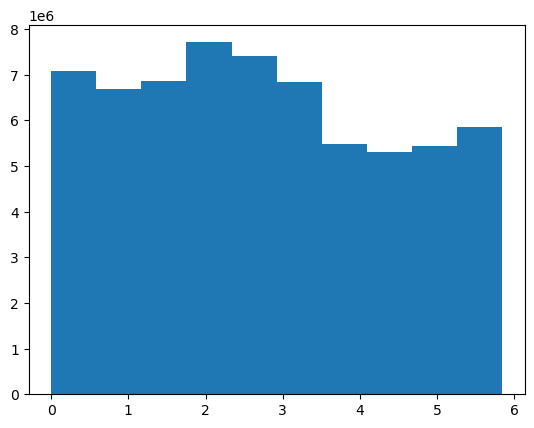

In [47]:
import matplotlib.pyplot as plt
plt.hist(data)

In [48]:
np.nanmin(data)

0.0

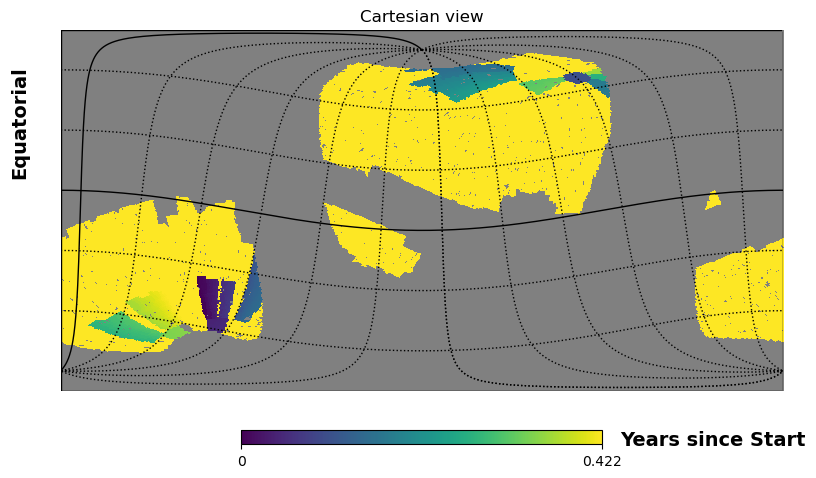

In [71]:

# https://healpy.readthedocs.io/en/latest/tutorial.html

# hp.mollview(
hp.cartview(
    data,  # in days since start
    # coord=["G"],
    rot=(170, 10),
    coord=['G', 'C'],  # galactic (plane of galaxy) to celestial (ra/dec)
    # title="Histogram equalized Ecliptic",
    unit="Years since Start",
    # norm="hist",
    min=np.nanmin(data),
    # max=np.nanmax(data),
    max=survey_time.days / 365,
    flip='geo'
)
hp.graticule()


# so after all that - EDF-N HAS been observed, almost from the start, and recently with extra area
# and south has been observed  more recently - around a month ago - but hasn't yet entered SAS

# yellow = has not been observed, but will be
# grey = will not be observed
# bluer = was observed, more blue = earlier

In [50]:
# hp.mollview(m, title="Mollview image RING")
# hp.graticule()